In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from datetime import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir(r'C:\Users\alanw\OneDrive\Varsity\Research\Code')

In [3]:
# Loading  data
df = pd.read_csv('data_not_cleaned.csv')

# Data Preparation
When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data,

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Scaling Data

In [5]:
scaler = StandardScaler()

scaler.fit(df.drop('Y',axis=1))

scaled_features = scaler.fit_transform(df.drop('Y',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

Setting up datasets

In [6]:
X = df_feat
y = df['Y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=69)

# Setting Up and Training The Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# create model
model = Sequential()
    
# output layer
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='normal', activation='sigmoid'))
        
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
# Early stop on validation accuracy
es = EarlyStopping(monitor = 'val_accuracy', patience = 25, restore_best_weights=True)

# Save the best model as best_banknote_model.hdf5
mc = ModelCheckpoint('best_simple_ann.hdf5', monitor = 'val_accuracy', save_best_only = True)

In [12]:
t0 = datetime.now()

In [13]:
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[mc] ,verbose=0) 

In [14]:
t1 = datetime.now()

In [15]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

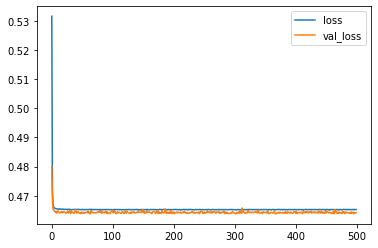

In [16]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

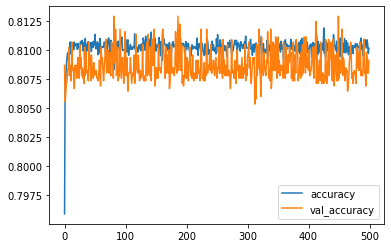

In [17]:
losses[['accuracy', 'val_accuracy']].plot()

In [18]:
from tensorflow.keras.models import load_model

In [19]:
ann = load_model('best_simple_ann.hdf5')

In [20]:
predictions = ann.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, plot_roc_curve

In [22]:
print(confusion_matrix(y_test,predictions))

[[3381  117]
 [ 725  277]]


In [23]:
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
kappa = cohen_kappa_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score: %.2f" % (f1))
print("Recall: %.2f" % (recall))
print("Precision: %.2f" % (precision))
print("Cohen's Kappa: %.2f" % (kappa))
print("Area Under Curve: %.2f" % (auc))
print("Execution Time: ", (t1 - t0))

Accuracy: 81.29%
F1-Score: 0.40
Recall: 0.28
Precision: 0.70
Cohen's Kappa: 0.31
Area Under Curve: 0.62
Execution Time:  0:04:31.824954


In [24]:
x, y = y_train.value_counts()
print("Model Split " + str(int(x/(x+y)*100)) + ":" + str(int(y/(x+y)*100)))

Model Split 77:22
